In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("../data/moore.csv", header=None).values
data[:10]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100],
       [1974, 4500],
       [1974, 8000],
       [1975, 3510],
       [1976, 5000],
       [1976, 8500]], dtype=int64)

In [21]:
# reshape data to right format (data_count, feature_count)
x = data[:, 0].reshape(-1, 1)
x[:10]

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976]], dtype=int64)

In [22]:
y = data[:, 1]
y[:10]

array([2300, 3500, 2500, 2500, 4100, 4500, 8000, 3510, 5000, 8500],
      dtype=int64)

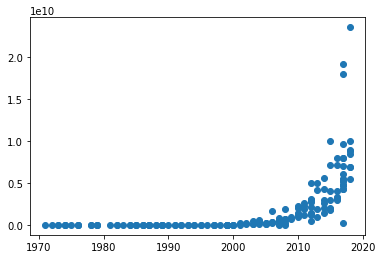

In [23]:
plt.scatter(x, y)

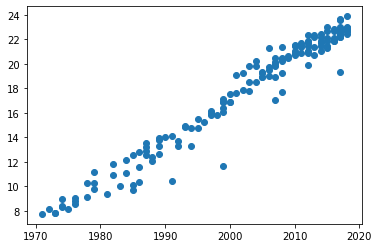

In [24]:
y = np.log(y)
plt.scatter(x, y)

In [25]:
# scale data
x = x - x.mean()

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.optimizers.SGD(0.0005, 0.9), loss="mse")

In [62]:
def lr_schedule(epoch, lr):
    if epoch < 100 and (epoch+1) % 10 == 0:
        return lr / 1.2
    return lr

scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [63]:
h = model.fit(x, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 223.8759
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 108.3385
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 89.7891
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 102.2894
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 76.1775
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 71.7657
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 70.3560
Epoch 8/200
6/6 [================

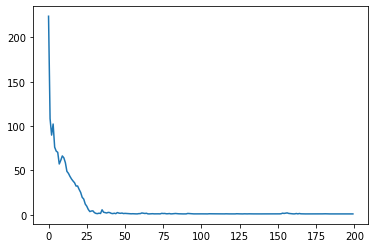

In [64]:
plt.plot(h.history["loss"])

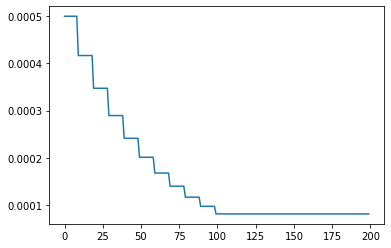

In [65]:
plt.plot(h.history["lr"])

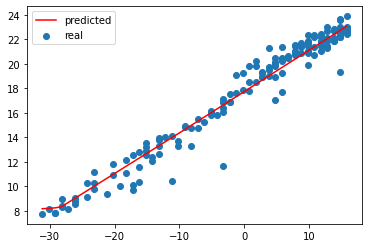

In [66]:
pred_y = model.predict(x)
pred_y = pred_y.flatten()

plt.scatter(x,y, label="real")
plt.plot(x,pred_y, "-r", label="predicted")
plt.legend()